In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random

chickweight = pd.read_csv('chick_weight.csv')
chickweight = chickweight.drop(['Unnamed: 0'], axis=1)

In [3]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
from itertools import combinations

In [4]:
def get_slope_and_intercept(X, Y):
    z = np.polyfit(X, Y, 1)
    p = np.poly1d(z)
    xp = np.linspace(0, 22, 100)
    return z[0], z[1]

In [5]:
def bootstrap(x):
    samp_x = []
    for i in range(len(x)):
        samp_x.append(random.choice(x))
    return samp_x

In [6]:
def bootstrap_data(data):
    new_df = pd.DataFrame(columns=["weight","Time","Chick","Diet"])
    for i in range(22):
        temp = data.loc[data['Time']==i]
        count_row = temp.shape[0]
        if(count_row==0):
            continue
        else:
            temp['weight'] = bootstrap(temp['weight'].values)
            new_df = pd.concat([new_df, temp], ignore_index=True)
    return new_df

In [7]:
def get_slopes_and_intercepts(chickweight):
    weight = 0
    time = 1
    uniqueDiets = chickweight.Diet.unique()
    num_shuffles = 100
    slope_out_dict = {}
    intercept_out_dict = {}
    for diet in uniqueDiets:
        print("======= Diet: ", diet,"=======")
        slope_out = []
        intercept_out = []
        for i in range(num_shuffles):
            if(i%20 == 0):
                print("Done: ", i, "/", num_shuffles)
            df_this_diet = chickweight[:][chickweight.Diet == diet]
            bootstrapped_df = bootstrap_data(df_this_diet)
            df_this_diet_values = bootstrapped_df.values
            X = np.array(df_this_diet_values[:,time], dtype=float)
            Y = np.array(df_this_diet_values[:,weight], dtype=float)
            
            slope, intercept = get_slope_and_intercept(X, Y)
            slope_out.append(slope)
            intercept_out.append(intercept)
        slope_out_dict[diet] = slope_out
        intercept_out_dict[diet] = intercept_out
    return slope_out_dict, intercept_out_dict

In [8]:
observed_slope = {1: 6.8417972,
                  2: 8.60913629,
                  3: 11.42287097,
                  4: 9.71436556}
observed_intercept = {1: 30.93,
                  2: 28.63,
                  3: 18.25,
                  4: 30.79}

In [9]:
slope_out, intercept_out = get_slopes_and_intercepts(chickweight)

======= Diet:  1 =======
Done:  0 / 100
Done:  20 / 100
Done:  40 / 100
Done:  60 / 100
Done:  80 / 100
======= Diet:  2 =======
Done:  0 / 100
Done:  20 / 100
Done:  40 / 100
Done:  60 / 100
Done:  80 / 100
======= Diet:  3 =======
Done:  0 / 100
Done:  20 / 100
Done:  40 / 100
Done:  60 / 100
Done:  80 / 100
======= Diet:  4 =======
Done:  0 / 100
Done:  20 / 100
Done:  40 / 100
Done:  60 / 100
Done:  80 / 100


In [18]:
import math
conf_interval = 0.9
slope_confs = {}
intercept_confs = {}

print("\n\n################## Slope ####################")
for key, value in slope_out.items():
    slope_conf = []
    diet = key
    value.sort()
    
    tails = (1 - conf_interval) / 2
    # in case our lower and upper bounds are not integers,
    # we decrease the range (the values we include in our interval),
    # so that we can keep the same level of confidence
    lower_bound = int(math.ceil(100 * tails))
    upper_bound = int(math.floor(100 * (1 - tails)))
    slope_conf.append(value[lower_bound])
    slope_conf.append(value[upper_bound])
    slope_confs[key] = slope_conf

    ######################################
    #
    # Output
    #
    ######################################

    # print observed value and then confidence interval
    
    print("**********Diet: ", diet,"**********")
    print ("Observed slope: %.2f" % observed_slope[key])
    print ("We have", conf_interval * 100, "% confidence that the true slope", end=" ")
    print ("is between: %.2f" % value[lower_bound], "and %.2f" % value[upper_bound])
print("\n\n################## Intercept ####################")
for key, value in intercept_out.items():
    intercept_conf = []
    diet = key
    value.sort()
    
    tails = (1 - conf_interval) / 2
    # in case our lower and upper bounds are not integers,
    # we decrease the range (the values we include in our interval),
    # so that we can keep the same level of confidence
    lower_bound = int(math.ceil(100 * tails))
    upper_bound = int(math.floor(100 * (1 - tails)))
    intercept_conf.append(value[lower_bound])
    intercept_conf.append(value[upper_bound])
    intercept_confs[key] = intercept_conf
    ######################################
    #
    # Output
    #
    ######################################

    # print observed value and then confidence interval
    print("**********Diet: ", diet,"**********")
    print ("Observed intercept: %.2f" % observed_intercept[key])
    print ("We have", conf_interval * 100, "% confidence that the true slope", end=" ")
    print ("is between: %.2f" % value[lower_bound], "and %.2f" % value[upper_bound])
    print (" ")



################## Slope ####################
**********Diet:  1 **********
Observed slope: 6.84
We have 90.0 % confidence that the true slope is between: 6.32 and 7.44
**********Diet:  2 **********
Observed slope: 8.61
We have 90.0 % confidence that the true slope is between: 7.57 and 9.74
**********Diet:  3 **********
Observed slope: 11.42
We have 90.0 % confidence that the true slope is between: 10.48 and 12.41
**********Diet:  4 **********
Observed slope: 9.71
We have 90.0 % confidence that the true slope is between: 9.05 and 10.28


################## Intercept ####################
**********Diet:  1 **********
Observed intercept: 30.93
We have 90.0 % confidence that the true slope is between: 27.73 and 34.24
 
**********Diet:  2 **********
Observed intercept: 28.63
We have 90.0 % confidence that the true slope is between: 21.42 and 34.84
 
**********Diet:  3 **********
Observed intercept: 18.25
We have 90.0 % confidence that the true slope is between: 11.76 and 24.26
 
********

In [24]:
def plot_confidence(df_this_diet, z_lower, z_upper):
    weight = 0
    time = 1
    df_this_diet = chickweight[:][chickweight.Diet == diet]
    df_this_diet_values = df_this_diet.values
    X = np.array(df_this_diet_values[:,time], dtype=float)
    Y = np.array(df_this_diet_values[:,weight], dtype=float)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(X, Y, alpha=0.5, color='orchid')
    ax.set(xlabel='Time (days)', ylabel='Weight')
    title = 'Confidence Interval Diet '+ str(diet)
    fig.suptitle(title)
    fig.tight_layout(pad=2)
    ax.grid(True)
    z = np.polyfit(X, Y, 1)
    p = np.poly1d(z)
    xp = np.linspace(0, 22, 100)
    ax.plot(xp, p(xp),'-', color='darkorchid', linewidth=2)

    lower_p = np.poly1d(z_lower)
    lower = lower_p(xp)

    upper_p = np.poly1d(z_upper)
    upper = upper_p(xp)
    ax.fill_between(xp, lower, upper, color='#555555', alpha=0.4)
    plt.show(fig)

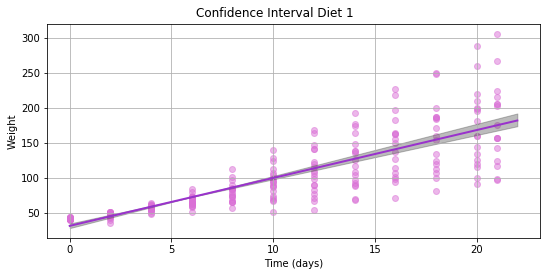

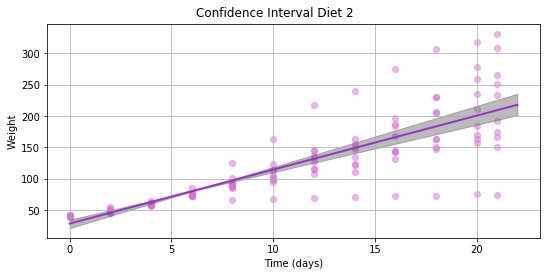

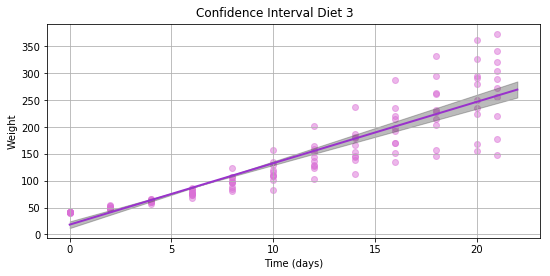

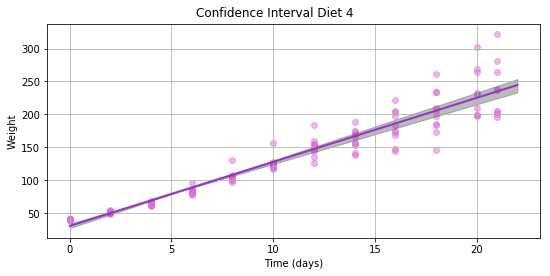

In [25]:
unique_diets = chickweight.Diet.unique()
for diet in unique_diets:
    slope_conf = slope_confs[diet]
    intercept_conf = intercept_confs[diet]
    z_lower = [slope_conf[0],intercept_conf[1]]
    z_upper = [slope_conf[1], intercept_conf[0]]
    plot_confidence(diet, z_lower, z_upper)